## Question 1
Spam filtering is an example of document classification task which involves classifying an email / SMS as spam or non-spam (a.k.a. ham).

 - Import the dataset from https://www.kaggle.com/uciml/sms-spam-collection-dataset. (1 point).
 - Split the data into training and testing. (1 point). Use 10-fold cross validation.(1 point)
 - Extract features using TF-IDF and display the features. ( 2 points)
 - Model and train the classifier using GaussianNB, BernoulliNB and MultinomialNB.( 3 points)
 - Evaluate classifiers on Test Data. ( 2 points)
 - Plot the decision boundary, visualize training and test results of all the models (3 points)

In [1]:
# importing required packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  
nltk.download('stopwords')  
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mayank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
model_list = []
accuracy_score_list = []
def plot_confusion_matrices(confusion_matrices):
    fig, axs = plt.subplots(2,5, figsize=(15,5)) 

    m = 0
    for i, ax_r in enumerate(axs):
        for j, ax in enumerate(ax_r):
            sns.heatmap(confusion_matrices[m], annot=True, cbar=False, cmap='Blues', fmt='g', ax = ax)
            ax.set_xlabel('Predicted label')
            ax.set_ylabel('True label')
            ax.set_title('{} {}'.format('fold', (m + 1)), fontsize=12, fontweight='bold')
            m += 1

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.tight_layout()
    plt.show()

In [3]:
url = 'https://raw.githubusercontent.com/brajbhushan-tripathi/ML_Assignment/master/Question1/spam.csv'
dataset = pd.read_csv(url, delimiter=',',encoding='latin-1')
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
dataset.columns = ['class_label','email_text']
dataset.head()

,class_label,email_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X = dataset.email_text.values  
y = dataset.class_label

processed_email_texts = []

for text in range(0, len(X)):  
    # Remove all the special characters
    processed_email_text = re.sub(r'\W', ' ', str(X[text]))
 
    # Substituting multiple spaces with single space
    processed_email_text= re.sub(r'\s+', ' ', processed_email_text, flags=re.I)
    
    # Remove stop words from email text
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    processed_email_text = pattern.sub('', processed_email_text)
  
    # Converting to Lowercase
    processed_email_text = processed_email_text.lower()

    processed_email_texts.append(processed_email_text)

In [5]:
tfidfconverter = TfidfVectorizer(
                    max_features=2000,
                    min_df=10,
                    max_df=0.9,
                    ngram_range=(1,3),
                    tokenizer=nltk.tokenize.word_tokenize
                    )
X = tfidfconverter.fit_transform(processed_email_texts).toarray()

In [6]:
feature_list = pd.concat([pd.Series(tfidfconverter.get_feature_names()),
                          pd.Series(tfidfconverter.idf_)], axis=1)
                          
feature_list.sample(5)

,0,1
1057,sunday,7.140782
1130,tomorrow,5.114829
260,congrats,6.629957
1283,woke,7.227794
613,juz,6.406813


0.8641396884230034


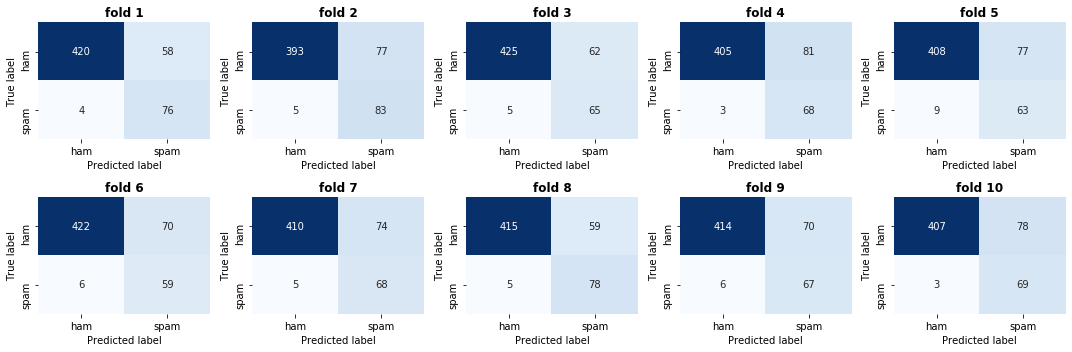

In [7]:
scores = []
m1 = GaussianNB()
model_list.append('Gaussian Naive Bayes')
conf_matrices = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    m1.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    scores.append(m1.score(X_test, y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

0.9847445030018728


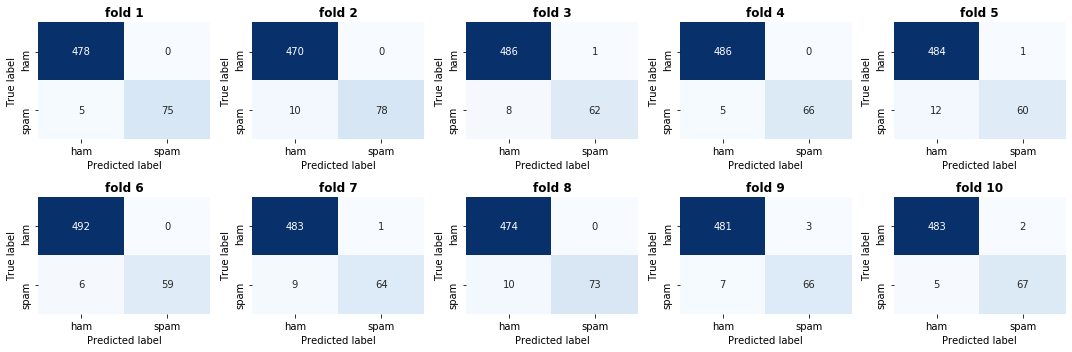

In [8]:
scores = []
m1 = MultinomialNB()
model_list.append('Multinomial Naive Bayes')
conf_matrices = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    m1.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    scores.append(m1.score(X_test, y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

0.985103891173272


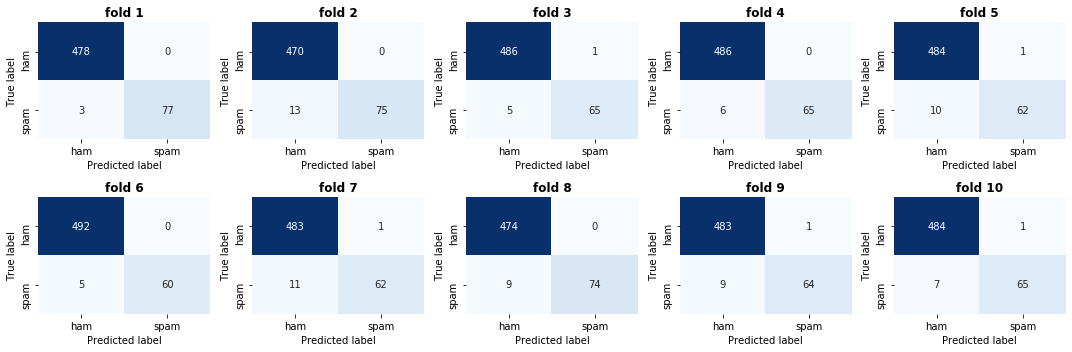

In [9]:
scores = []
m1 = BernoulliNB()
model_list.append('Bernoulli Naive Bayes')
conf_matrices = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    m1.fit(X_train, y_train)
    y_pred = m1.predict(X_test)
    scores.append(m1.score(X_test, y_test))
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    conf_matrices.append(conf_matrix)
mean_score = np.mean(scores)
print(mean_score)
accuracy_score_list.append(mean_score)
plot_confusion_matrices(conf_matrices)

In [10]:
results = pd.DataFrame(accuracy_score_list, index=list(model_list), columns=['test_accuracy'])
results

,test_accuracy
Gaussian Naive Bayes,0.864140
Multinomial Naive Bayes,0.984745
Bernoulli Naive Bayes,0.985104


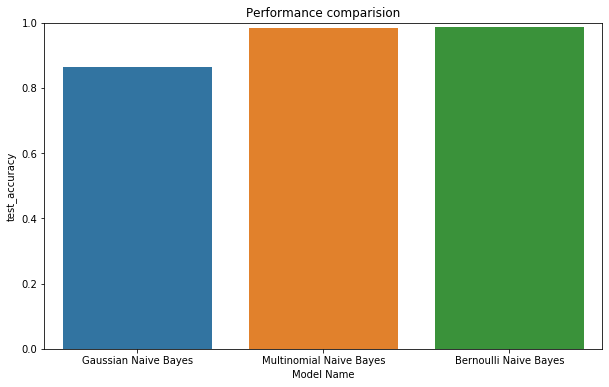

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(y ='test_accuracy', x=results.index, data=results)
plt.ylim(0., 1.0)
plt.title('Performance comparision')
plt.xlabel('Model Name')
plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(
                    data = principalComponents,
                    columns = ['principal component 1', 'principal component 2']
                    )
df = pd.concat([principalDf, dataset.class_label], axis=1)

In [13]:
df.sample(5)

,principal component 1,principal component 2,class_label
4693,-0.035774,0.011750,ham
1799,-0.035483,0.010623,ham
2422,0.158323,-0.045705,ham
2229,-0.015665,-0.008896,ham
558,-0.038516,0.004518,ham


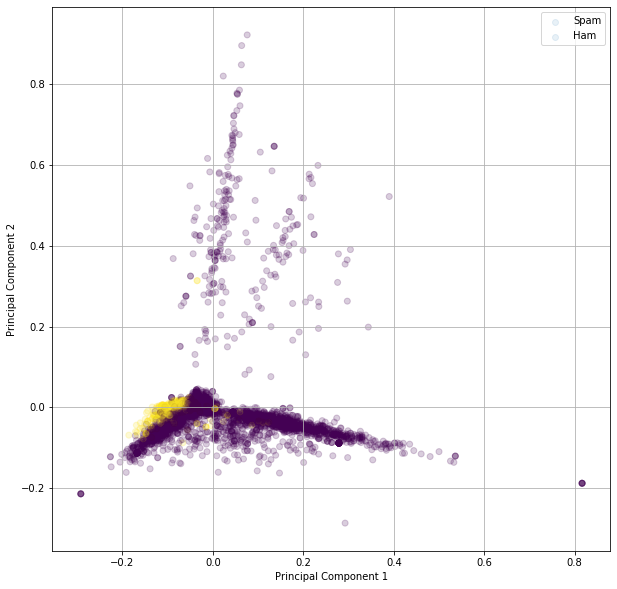

In [14]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
class_label_map = {'spam': 1, 'ham': 0}

for label in ['Spam','Ham']:
    
    plt.scatter(df['principal component 1'], 
                df['principal component 2'],
                c=np.vectorize(class_label_map.get)(m1.predict(X)),
                marker='o',
                alpha=0.1,
                label=label
           )
    
ax.legend()
ax.grid(True)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()